# Project 4- Flight Price Prediction

Contents-

--1- Problem Statment

--2- About

--3- Importing Important Libraries and Dataset

--4- EDA- Exploratry Data Analsys
    
--5- Visualization
    
--6- Data PreProcessing - Label Encoding

--7- Feature Selection
    6.1 Correlation
    6.2 VIF - Variance Inflation Factor

--8- Modeling
    8.1 Decison Tree Model
    8.2 Linear Regression Model
    8.3 Random Froest Model

--9- Conclusions

# 1. Problem Statment

'''
The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. 
A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. 
Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

'''

# 2. About

'''The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct
various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical
algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform
for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data
will aid in the discovery of valuable insights that will be of enormous value to passengers.'''

# 3. Importing  Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('Flight_Booking.csv')


In [3]:
# check the basic ifomation of our dataset

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#Data set have total 300152 records with 12 attributes

Attributes        -    Description

Airline           -    Name of the airline company

Flight            -    Plane's flight code

Source City       -    City from which the flight takes off

Departure Time    -    Time of Departure

Stops             -    Number of stops between the source and destination cities

Arrival Time      -    Time of Arrival

Destination City  -    City where the flight will land

Class             -    Contains information on seat class

Duration          -    Overall amount of time taken to travel between cities in hours.

Days left         -    Subtracting the trip date by the booking date.

Price             -    Ticket pric

In [4]:
# drop the 'Unnamed: 0' , as it contains the index only
data=data.drop(columns=['Unnamed: 0'])
data=data.drop(columns=['flight'])

In [5]:
# see the first five records
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#check the shape of data
data.shape

(300153, 10)

# 4. EDA Exploratry Data Analysis

In [7]:
# check the null values/missing values
data.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
# check the duplicate values
data.duplicated().sum()

2213

# 5. Visualizations

5.1 Price vs Airlines plot

Text(0.5, 1.0, 'Price vs Airlines')

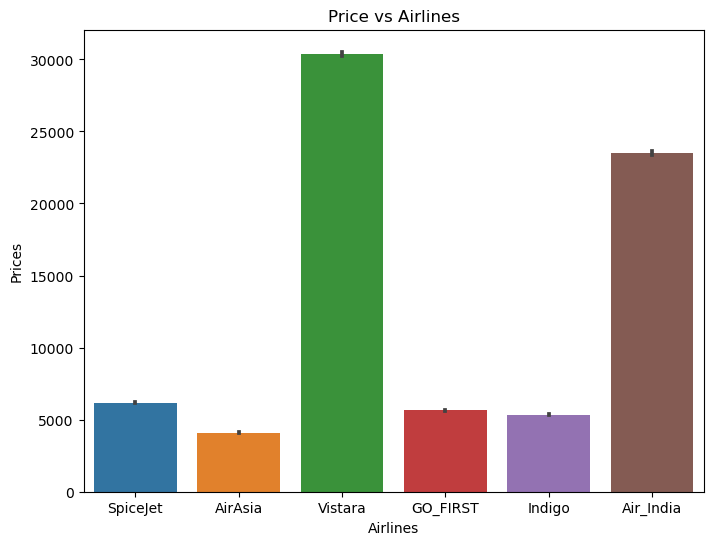

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x='airline',y='price',data=data)
plt.xlabel('Airlines',fontsize=10)
plt.ylabel('Prices',fontsize=10)
plt.title('Price vs Airlines')

As per above graph is showing the prices of Vistara adn AirIndia flight is higher than other airlines

Text(0.5, 1.0, 'Prices vs Days Left left for Departure')

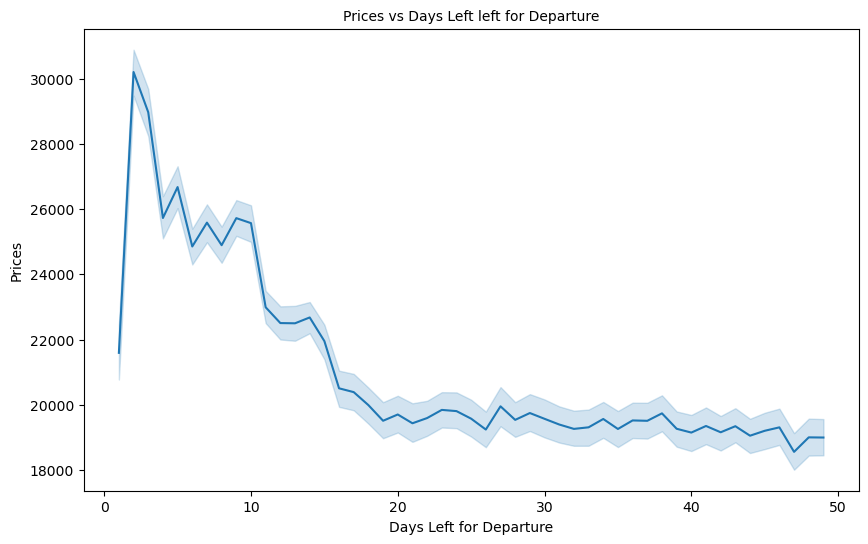

In [10]:
# Plot prices vs Days letf

plt.figure(figsize=(10,6))
sns.lineplot(x='days_left',y='price',data=data)
plt.xlabel('Days Left for Departure',fontsize=10)
plt.ylabel('Prices',fontsize=10)
plt.title('Prices vs Days Left left for Departure',fontsize=10)

As per above graph we can see as days left is increase the prices of flight is  decrecse

Text(0.5, 1.0, 'Flight Prices vs Class of Flights')

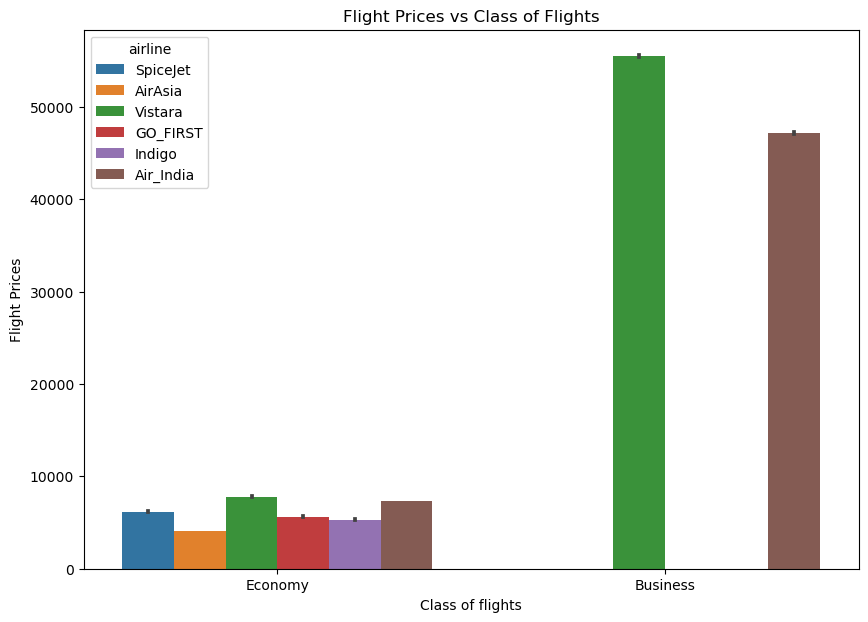

In [11]:
# check the graphs class vs prices

plt.figure(figsize=(10,7))
sns.barplot(x='class',y='price',data=data,hue='airline')
plt.xlabel("Class of flights",fontsize=10)
plt.ylabel("Flight Prices",fontsize=10)
plt.title("Flight Prices vs Class of Flights")


Above graph is showing the prices of Bussiness Class is high for Visatara and AirInda flight

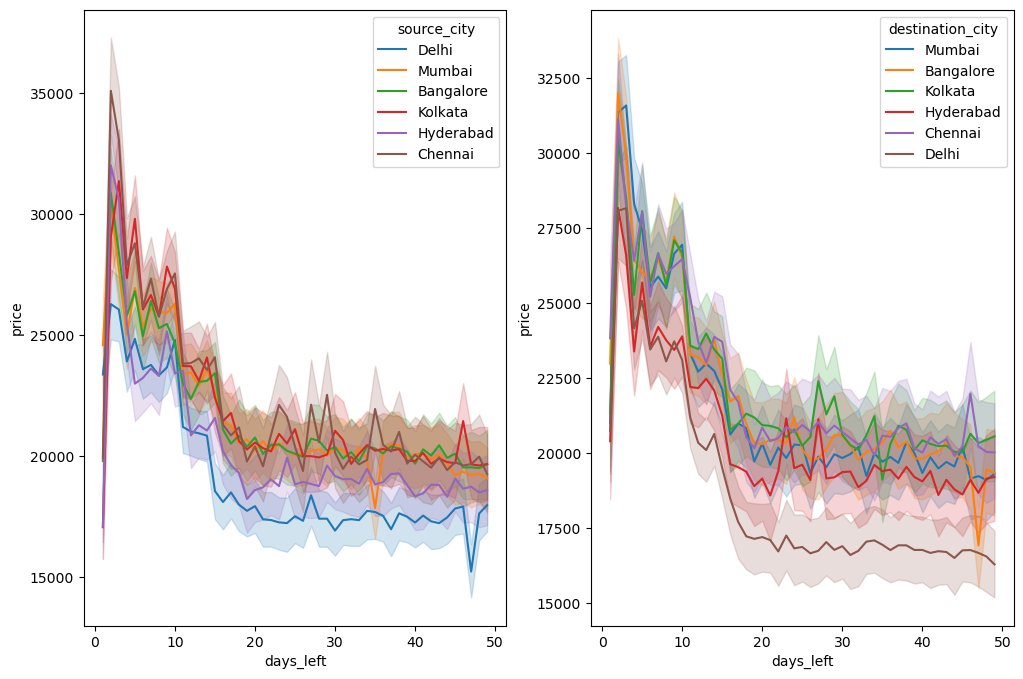

In [12]:
# Subplot of Source City and Destination City
fig,ax=plt.subplots(1,2,figsize=(12,8))
sns.lineplot(x='days_left',y='price',data=data,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=data,hue='destination_city',ax=ax[1])
plt.show()

In [13]:
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Text(0.5, 1.0, 'Frequency of class')

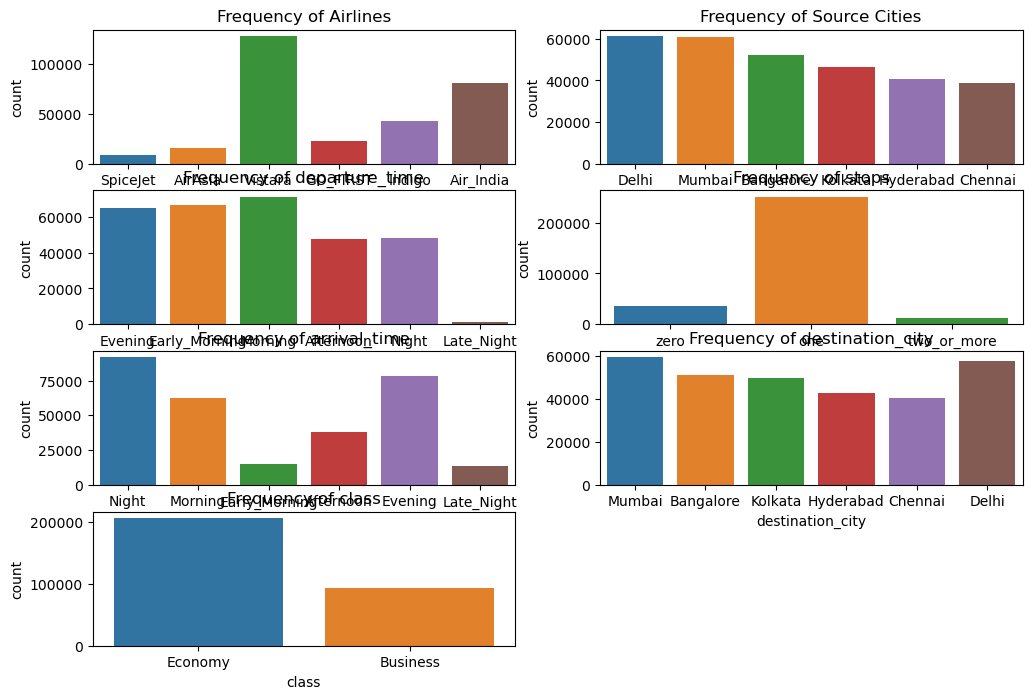

In [14]:
# subplots of categorical feratures
plt.figure(figsize=(12,8))


plt.subplot(4,2,1)
sns.countplot(x=data['airline'],data=data)
plt.title("Frequency of Airlines")


plt.subplot(4,2,2)
sns.countplot(x=data['source_city'],data=data)
plt.title("Frequency of Source Cities")


plt.subplot(4,2,3)
sns.countplot(x=data['departure_time'],data=data)
plt.title("Frequency of departure_time")


plt.subplot(4,2,4)
sns.countplot(x=data['stops'],data=data)
plt.title("Frequency of stops")


plt.subplot(4,2,5)
sns.countplot(x=data['arrival_time'],data=data)
plt.title("Frequency of arrival_time")


plt.subplot(4,2,6)
sns.countplot(x=data['destination_city'],data=data)
plt.title("Frequency of destination_city")

plt.subplot(4,2,7)
sns.countplot(x=data['class'],data=data)
plt.title("Frequency of class")


In [15]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [16]:
data.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [17]:
# PreProcessing the data for model
# One hot encoding on categoricl data

#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#data_dummies=pd.get_dummies(data)
#data_dummies

# 6 Data PreProcessing - Label Encoding/ One Hot Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['airline']=le.fit_transform(data['airline'])
data['source_city']=le.fit_transform(data['source_city'])
data['departure_time']=le.fit_transform(data['departure_time'])
data['stops']=le.fit_transform(data['stops'])
data['arrival_time']=le.fit_transform(data['arrival_time'])
data['destination_city']=le.fit_transform(data['destination_city'])
data['class']=le.fit_transform(data['class'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int32  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   class             300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 14.9 MB


# 7. Feature Selection -
We can use below methods for using the feature selections.
1- Correlation
2-VIF (Variance Inflation Factor)



As per below heatmap the class has high negetive correlation with price and Airline has very low postive correlation with price.


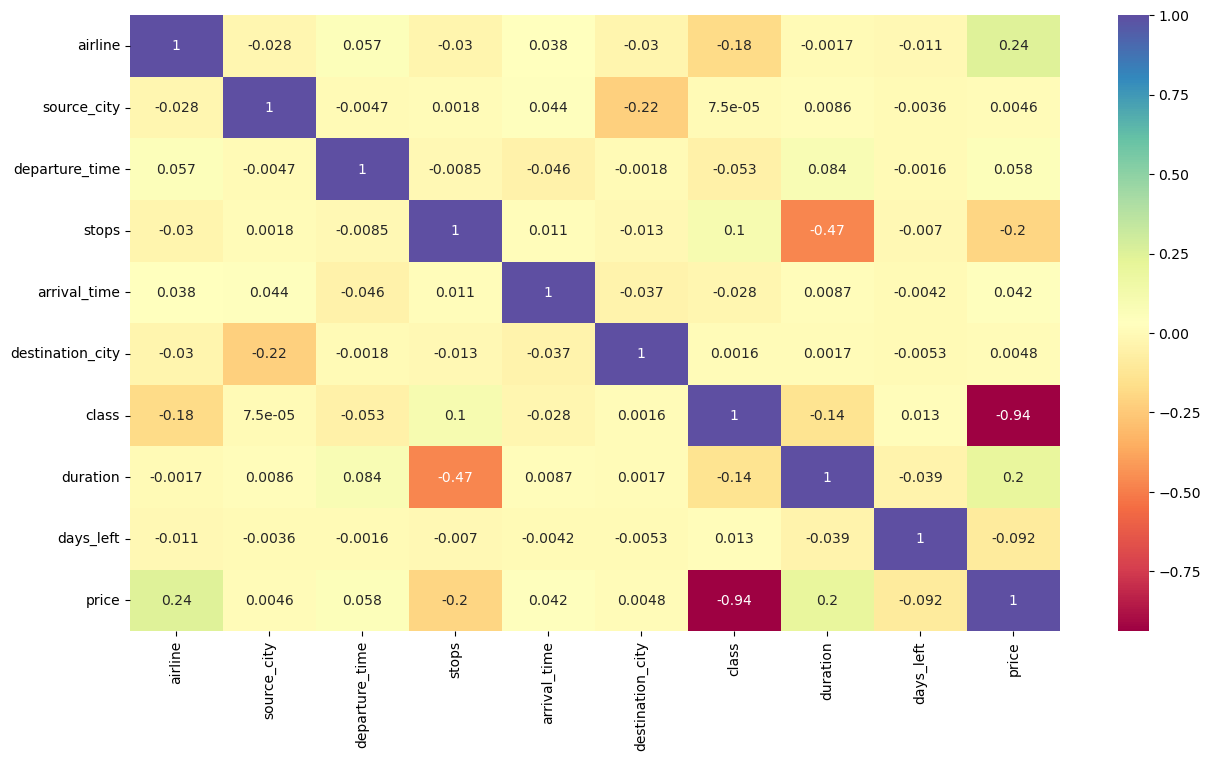

In [19]:
# Check the correlation price with other features

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='Spectral')
print(f'As per below heatmap the class has high negetive correlation with price and Airline has very low postive correlation with price.')

As per below heatmap the class has high negetive correlation with price and Airline has very low postive correlation with price.


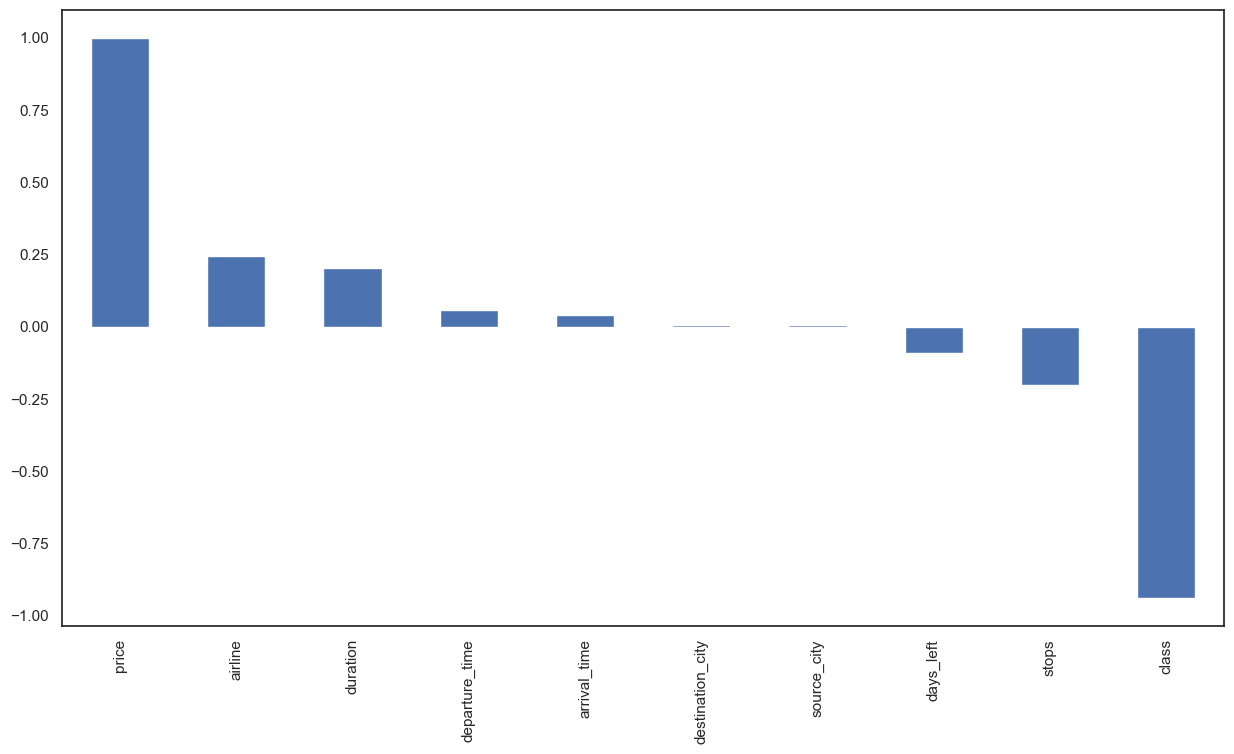

In [20]:
#Another way to see the correlation of Price with other features.

plt.figure(figsize=(15,8))
sns.set(style='white')
data.corr()['price'].sort_values(ascending=False).plot(kind='bar')

print(f"As per below heatmap the class has high negetive correlation with price and Airline has very low postive correlation with price.")

In [21]:
# 2 VIF -Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in data.columns:
    if ((data[col].dtype!= 'object')& (col!='price')):
        col_list.append(col)
        
x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


As per above VIF result we can see that all values are below 5, so will be selecting all features for our modeling.

# 8. Modeling

In [48]:
#8.1 Data split into Independent and Dependent variables
x=data.iloc[:,:-1]   
y=data.iloc[:,-1]


In [49]:
# Importing the Libaraies for modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
# Data Split into Train Test 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)


(240122, 9)
(60031, 9)
(60031,)
(240122,)


# 8.1 Decision Tree Model

In [80]:
ds=DecisionTreeRegressor()
ds.fit(x_train,y_train)
y_pred_ds=ds.predict(x_test)

mae=mean_absolute_error(y_pred_ds,y_test)
print(f'Mean Abslute Error',mae)

print("-"*60)
mse=mean_squared_error(y_pred_ds,y_test)
print(f'Mean Squared Error',mse)

print("-"*60)
mape=mean_absolute_percentage_error(y_pred_ds,y_test)
print(f'Mean Abslute Percentage Error',mape)

print("-"*60)
rmqe=np.sqrt(metrics.mean_squared_error(y_pred_ds,y_test))
print(f'Root Mean Squared Error',rmqe)



Mean Abslute Error 1298.3765193538895
------------------------------------------------------------
Mean Squared Error 14103229.159084937
------------------------------------------------------------
Mean Abslute Percentage Error 0.08303052070341438
------------------------------------------------------------
Root Mean Squared Error 3755.4266281056452


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


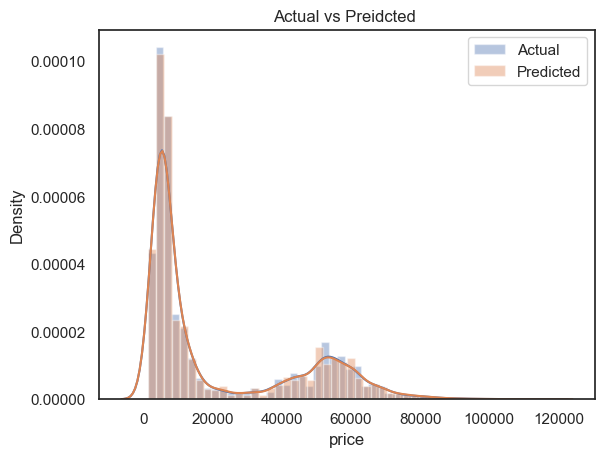

In [88]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred_ds,label="Predicted")
plt.title('Actual vs Preidcted ')
plt.legend()

# 8.2 Linear Regression Model

In [82]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual_Value','Predict_Value'])
difference



,Actual_Value,Predict_Value
0,7366.0,4572.477222
1,64831.0,52809.226907
2,6195.0,7857.626650
3,60160.0,56096.253996
4,6578.0,6656.438105
...,...,...
60026,5026.0,5820.248216
60027,3001.0,486.438325
60028,6734.0,5837.956605
60029,5082.0,-1555.511279


Mean Abslute Error 4627.355215760223
------------------------------------------------------------
Mean Squared Error 49201433.71164045
------------------------------------------------------------
Mean Abslute Percentage Error 1.362725371202542
------------------------------------------------------------
Root Mean Squared Error 7014.373365571614


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


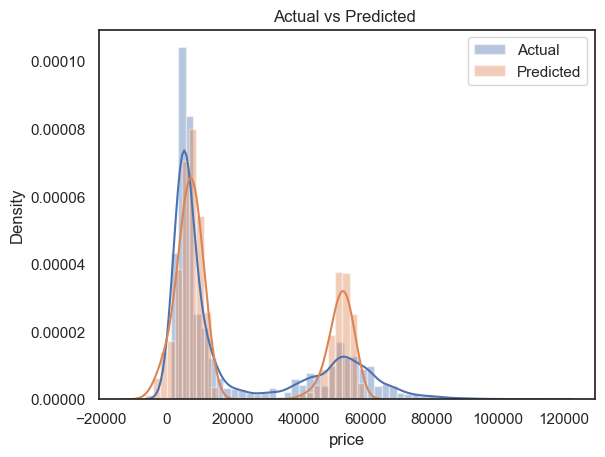

In [87]:
mae=mean_absolute_error(lr_pred,y_test)
print(f'Mean Abslute Error',mae)

print("-"*60)
mse=mean_squared_error(lr_pred,y_test)
print(f'Mean Squared Error',mse)

print("-"*60)
mape=mean_absolute_percentage_error(lr_pred,y_test)
print(f'Mean Abslute Percentage Error',mape)

print("-"*60)
rmqe=np.sqrt(metrics.mean_squared_error(lr_pred,y_test))
print(f'Root Mean Squared Error',rmqe)

sns.distplot(y_test,label="Actual")
sns.distplot(lr_pred,label="Predicted")
plt.title("Actual vs Predicted ")
plt.legend()

# 8.3 Random Forest Model

Mean Abslute Error 1195.5186698280625
------------------------------------------------------------
Mean Squared Error 8962551.168934606
------------------------------------------------------------
Mean Abslute Percentage Error 0.07633078746353272
------------------------------------------------------------
Root Mean Squared Error 2993.7520219508174


C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DHEERU\anaconda3 D\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


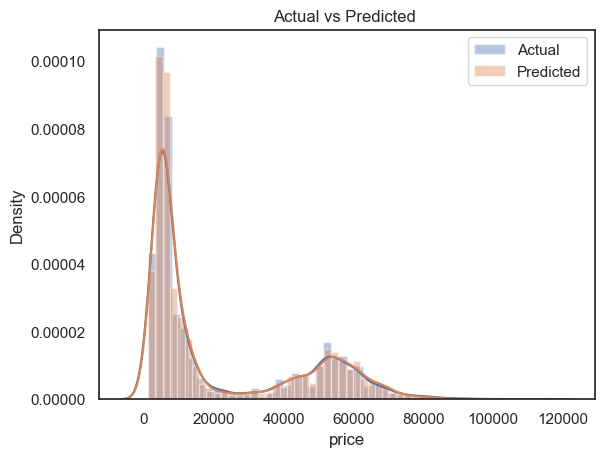

In [91]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

mae=mean_absolute_error(rf_pred,y_test)
print(f'Mean Abslute Error',mae)

print("-"*60)
mse=mean_squared_error(rf_pred,y_test)
print(f'Mean Squared Error',mse)

print("-"*60)
mape=mean_absolute_percentage_error(rf_pred,y_test)
print(f'Mean Abslute Percentage Error',mape)

print("-"*60)
rmqe=np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
print(f'Root Mean Squared Error',rmqe)

sns.distplot(y_test,label="Actual")
sns.distplot(rf_pred,label="Predicted")
plt.title("Actual vs Predicted ")
plt.legend()

# 9. Conclusion

#Mean Absolute Percentage Error (1.362725371202542) for Linear Regression Model is higer than other 2 models.

#Root Mean Square Error (7014.373365571614) for Linear Regression Model is higer than other 2 models.